In [1]:
%cd "/content/drive/MyDrive/My Projects/face-verification-with-siamese-network"

/content/drive/MyDrive/My Projects/face-verification-with-siamese-network


In [2]:
!pip install import-ipynb

In [3]:
# import required libraries
import import_ipynb
import utils
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.utils import shuffle
from imutils import build_montages
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

importing Jupyter notebook from utils.ipynb


In [4]:
# define a path for data and list all of the images
# in the path and then shuffle them
path = "extracted-celeb-data"
imagePaths = list(paths.list_images(path))
imagePaths = shuffle(imagePaths)

In [5]:
# initialize data list for reading and storing images and
# intensity values and initialize labels list to store 
# the image labels 
data = []
labels = []

# loop through the list  image paths
for i in imagePaths:
  # read the label from the path and append it to labels list
  label = i.split(os.path.sep)[-2]
  labels.append(label)
  # read the current image and convert it into gray scale and
  # then append it to the data list
  image = cv2.imread(i , 0)
  image = img_to_array(image)
  data.append(image)

In [6]:
# convert the lists into Numpy array format
data = np.array(data , dtype = "float32")
labels = np.array(labels)

# for convenience we drop the color channel of the images
data = np.squeeze(data, axis = -1)

In [7]:
# define a dictionary to map each and every label into 
# a specific number
label_dict = {
    "George_Clonney" : 0,
    "Nicolas_Cage" : 1,
    "Tom_Cruise" : 2,
    "Matt_Damon" : 3,
}

labels = list(map(lambda x : label_dict[x], labels))

In [8]:
# split the data into X and y and train set and
# test set with 80% ratio
X_train = np.array(data[:int(.8 * len(data))])
X_test = np.array(data[int(.8 * len(data)):])
y_train = np.array(labels[:int(.8 * len(data))])
y_test = np.array(labels[int(.8 * len(data)):])

In [9]:
# build the positive and negative image pairs for both 
# training and testing set
(pairTrain, labelTrain) = utils.make_pairs(X_train , y_train)
(pairTest, labelTest) = utils.make_pairs(X_test , y_test)

# build the `images` list that we will be using for montage
images = []

In [10]:
# loop over a sample of training dataset
for i in np.random.choice(np.arange(0, len(pairTrain)) , size=(49,)):
  # grab a sample image pair and corresponding label
  imageA = pairTrain[i][0]
  imageB = pairTrain[i][1]
  label = labelTrain[i]

  # stack the image pairs horizontally to
  # visualize them properly
  pair = np.hstack([imageA , imageB])

  # print neg if the corresponding label is 0
  # otherwise print pos
  text = "neg" if label[0] == 0 else "pos"
  color = (255, 0, 0) if label[0] == 0 else (0, 255, 0)

  # create a RGB channel from a gray scale image,
  # resize it and then put the corresponding text
  vis = cv2.merge([pair] * 3)
  vis = cv2.resize(vis , (96, 51) , interpolation = cv2.INTER_LINEAR)
  cv2.putText(vis , text, (2 , 12) , cv2.FONT_HERSHEY_SIMPLEX , 0.75,
              color, 2)
  
  # add the current image to the images list in 
  # order to montage them
  images.append(vis)

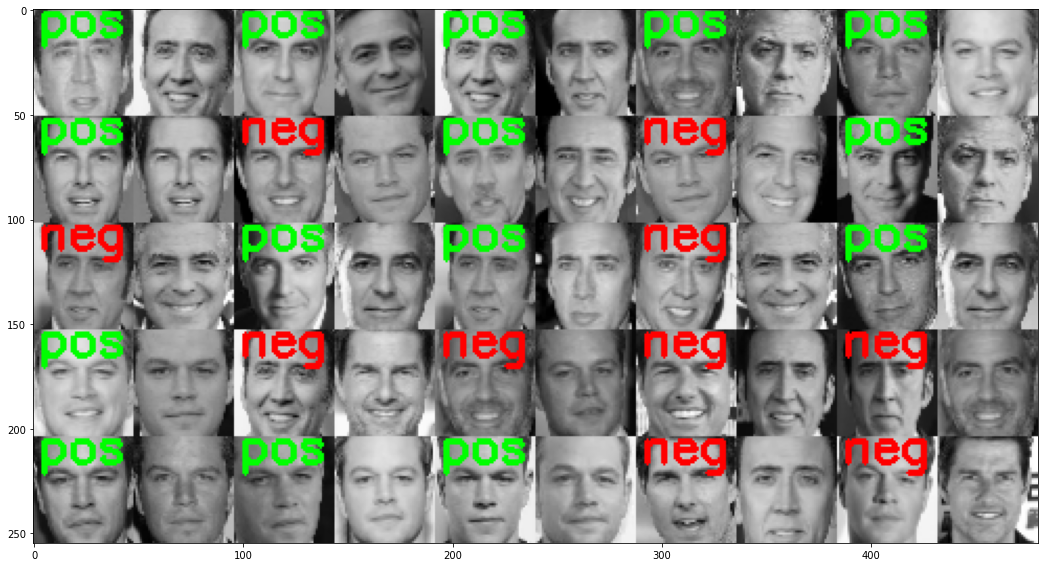

In [11]:
montage = build_montages(images, (96, 51), (5, 5))[0]
plt.figure(figsize=(18,12))
plt.imshow(montage , cmap="gray")
plt.savefig("output/image-pairs.png")